Importing required libraries and accessing dataset stored in Google Drive.

In [1]:
import cv2 #For the purpose of plotting images
import numpy as np
from matplotlib import pyplot as plt
#from google.colab import drive
#drive.mount('/drive')

1) Loading, priniting dimensions, and displaying our target image, and patch images from the drive.

(428, 760, 3)
(42, 53, 3)
(64, 98, 3)
(79, 103, 3)


<Figure size 432x288 with 0 Axes>

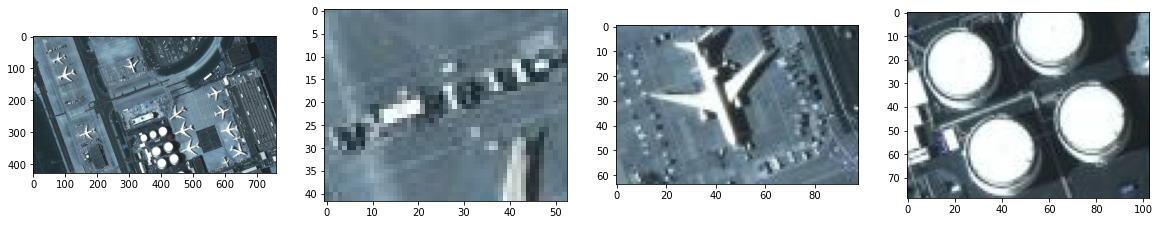

In [2]:
#imgTarget=cv2.imread('/drive/My Drive/Colab Notebooks/CV_ASSIGNMENT_1/Dataset/target_image.jpeg')
#imgPatch1=cv2.imread("/drive/My Drive/Colab Notebooks/CV_ASSIGNMENT_1/Dataset/patch1.PNG")
#imgPatch2=cv2.imread("/drive/My Drive/Colab Notebooks/CV_ASSIGNMENT_1/Dataset/patch2.PNG")
#imgPatch3=cv2.imread("/drive/My Drive/Colab Notebooks/CV_ASSIGNMENT_1/Dataset/patch3.PNG")
imgTarget0=cv2.imread("Images/target_image.jpeg")
imgPatch1=cv2.imread("Images/patch1.PNG")
imgPatch2=cv2.imread("Images/patch2.PNG")
imgPatch3=cv2.imread("Images/patch3.PNG")
print(imgTarget0.shape)
print(imgPatch1.shape)
print(imgPatch2.shape)
print(imgPatch3.shape)

plt.figure()
fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 4, 1)
plt.imshow(imgTarget0)
fig.add_subplot(1, 4, 2)
plt.imshow(imgPatch1)
fig.add_subplot(1, 4, 3)
plt.imshow(imgPatch2)
fig.add_subplot(1, 4, 4)
plt.imshow(imgPatch3)

plt.show()

Converting images to grayscale.

In [3]:
# Converting images to grayscale
imgTargetGray = cv2.cvtColor(imgTarget0, cv2.COLOR_BGR2GRAY)
imgPatch1Gray = cv2.cvtColor(imgPatch1, cv2.COLOR_BGR2GRAY)
# Store width and height of patch image in w and h
w, h = imgPatch1Gray.shape[::-1]

Making a standardization function so that we can minimize the risk of overflow.

In [4]:
def findMean(imgOrignal):
    meanOutput=0
    print(imgOrignal.shape)
    for y in range(0,(imgOrignal.shape[0]-1)):
        for y in range(0,(imgOrignal.shape[1]-1)):
            #meanOutput=meanOutput+(imgOrignal[y,x]/(imgOrignal.shape[1]*imgOrignal.shape[0]))
            print([y,x])
    return meanOutput

In [5]:
def standardizeImg(imgOrignal):
    return imgOrignal-imgOrignal.mean()

Making a function to find Cross Correlation

In [6]:
def findResultant(imgOne):
    return sum(sum(imgOne*imgOne))**(1/2)

In [7]:
def findCrossCorrelation(imgOne,imgTwo):
    if(imgOne.shape==imgTwo.shape):
        return sum(sum(imgOne*imgTwo))
    else:
        print("Dimensions of given inputs do not match.")
        return

In [8]:
def findNormCrossCorrelation(imgOne,imgTwo):
    if(imgOne.shape==imgTwo.shape):
        return findCrossCorrelation(imgOne,imgTwo)/((findResultant(imgOne))*(findResultant(imgTwo)))
    else:
        print("Dimensions of given inputs do not match.")
        return

In [9]:
def similarityTemplateCrossCorrelaton(imgPatch,imgTarget):
    if (imgTarget.shape[0]-imgPatch.shape[0]>-1)and(imgTarget.shape[1]-imgPatch.shape[1]>-1):
        output=np.zeros([imgTarget.shape[0]-imgPatch.shape[0]+1,imgTarget.shape[1]-imgPatch.shape[1]+1])
        for x in range(0,imgTarget.shape[0]-imgPatch.shape[0]+1): ##+1
            for y in range(0,imgTarget.shape[1]-imgPatch.shape[1]+1): ##+1
                output[x,y]=findCrossCorrelation(imgPatch,imgTarget[x:x+imgPatch.shape[0],y:y+imgPatch.shape[1]])
        return output
    else:
        print("Target image dimension is less than the target image dimension")
        return

In [10]:
def similarityTemplateNormCrossCorrelaton(imgPatch,imgTarget):
    if (imgTarget.shape[0]-imgPatch.shape[0]>-1)and(imgTarget.shape[1]-imgPatch.shape[1]>-1):
        output=np.zeros([imgTarget.shape[0]-imgPatch.shape[0]+1,imgTarget.shape[1]-imgPatch.shape[1]+1])
        for x in range(0,imgTarget.shape[0]-imgPatch.shape[0]+1): ##+1
            for y in range(0,imgTarget.shape[1]-imgPatch.shape[1]+1): ##+1
                output[x,y]=findNormCrossCorrelation(imgPatch,imgTarget[x:x+imgPatch.shape[0],y:y+imgPatch.shape[1]])
        return output
    else:
        print("Target image dimension is less than the target image dimension")
        return

2) Taking Normalized Cross Correlation, and simpl Cross Correlation.

In [11]:
resolutionCrossCorr = similarityTemplateCrossCorrelaton(standardizeImg(imgPatch1Gray),standardizeImg(imgTargetGray))

In [12]:
resolutionCrossCorrNorm = similarityTemplateNormCrossCorrelaton(standardizeImg(imgPatch1Gray),standardizeImg(imgTargetGray))

Just checking how would both type of correlation/similarity results look like.

In [13]:
print(resolutionCrossCorr.max())
print(resolutionCrossCorrNorm.max())

2218188.783018868
0.8644379601466428


Now writing a function that takes on target image, and patch image; It would return target image with highlighted patch if it is in it based on Normalized Cross Correlation based on given threshold of similarity.

In [14]:
def imgHighlightCrossCorrNorm(threshold,resolutionCrossCorrNorm,imgOutputHiglightedRGB,patchWidth,patchHeight):
  #Getting size
  # Store the coordinates of matched area in a numpy array
  location = np.where(resolutionCrossCorrNorm >= threshold)
  # Draw a rectangle around the matched region
  for point in zip(*location[::-1]):
    cv2.rectangle(imgOutputHiglightedRGB, point, (point[0] + patchWidth, point[1] + patchHeight), (0, 0, 255), 2)
  return imgOutputHiglightedRGB

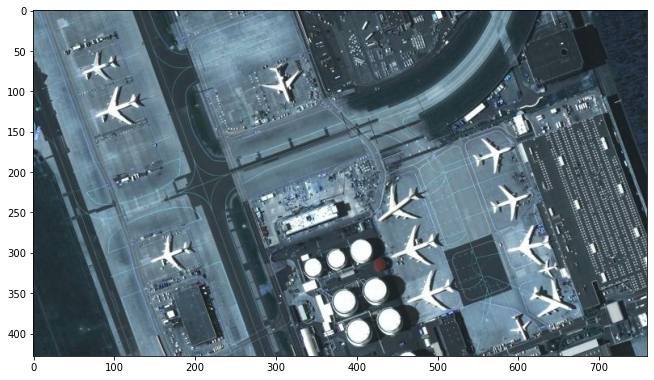

In [15]:
#Setting Threshold to be 0.9 for Cross Correlation Normalized
threshold=0.9
imgTarget1=imgTarget0
#Giving functio image to be highlighted based on Cross Correlation Normalized Results
imgOutputHiglightedCrossCorrNormRGB=imgHighlightCrossCorrNorm(threshold,resolutionCrossCorrNorm,imgTarget1,w,h)
plt.figure(figsize=(11, 11))
plt.imshow(imgOutputHiglightedCrossCorrNormRGB)
plt.show()
plt.close() 

Helping function to find maximum and minimum value coordinates

In [16]:
def findMax2DIndex(resolution):
  location=[0,0]
  maxVal=resolution[0,0]
  for x in range(0,resolution.shape[0]):
    for y in range(0,resolution.shape[1]):
      if(resolution[x,y]>maxVal):
        maxVal=resolution[x,y]
        location=[x,y]
  return location

In [17]:
def findMin2DIndex(resolution):
  location=[0,0]
  minVal=resolution[0,0]
  for x in range(0,resolution.shape[0]):
    for y in range(0,resolution.shape[1]):
      if(resolution[x,y]<minVal):
        minVal=resolution[x,y]
        location=[x,y]
  return location

Now writing a function that takes on target image, and patch image; It would return target image with highlighted patch if it is in it based on Cross Correlation based on given threshold of similarity.

In [18]:
def imgHighlightCrossCorr(resolutionCrossCorr,imgOutputHiglightedRGB,patchWidth,patchHeight):
  # Store the coordinates of matched area in a numpy array
  location = findMax2DIndex(resolutionCrossCorr)
  # Draw a rectangle around the matched region
  cv2.rectangle(imgOutputHiglightedRGB, (location[1],location[0]), (location[1] + patchWidth, location[0] + patchHeight), (0, 255, 0), 2)
  return imgOutputHiglightedRGB

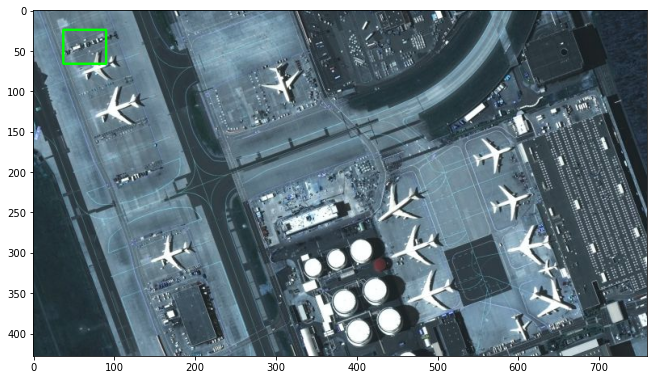

In [19]:
#Giving functio image to be highlighted based on Correlation Results
imgTarget2=imgTarget0
imgOutputHiglightedCrossCorrRGB=imgHighlightCrossCorr(resolutionCrossCorrNorm,imgTarget2,w,h);
plt.figure(figsize=(11, 11))
plt.imshow(imgOutputHiglightedCrossCorrRGB)
plt.show()
plt.close() 

Making a disimilarity function; L2 Norm or in other words computing Eucledian distance.

In [20]:
def findEucledianDistL2(imgOne,imgTwo):
    if(imgOne.shape==imgTwo.shape):
        return sum(sum((imgOne-imgTwo)**2))**(1/2)
    else:
        print("Dimensions of given inputs do not match.")
        return

In [21]:
def disimilarityTemplateEucledianDistL2(imgPatch,imgTarget):
    if (imgTarget.shape[0]-imgPatch.shape[0]>-1)and(imgTarget.shape[1]-imgPatch.shape[1]>-1):
        output=np.zeros([imgTarget.shape[0]-imgPatch.shape[0]+1,imgTarget.shape[1]-imgPatch.shape[1]+1])
        for x in range(0,imgTarget.shape[0]-imgPatch.shape[0]+1): ##+1
            for y in range(0,imgTarget.shape[1]-imgPatch.shape[1]+1): ##+1
                output[x,y]=findEucledianDistL2(imgPatch,imgTarget[x:x+imgPatch.shape[0],y:y+imgPatch.shape[1]])
        return output
    else:
        print("Target image dimension is less than the target image dimension")
        return

In [22]:
def imgHighlightDisimilarityTemplateEucledianDistL2(resolutionDisimilarityEucledianDistL2,imgOutputHiglightedRGB,patchWidth,patchHeight):
  # Store the coordinates of matched area in a numpy array
  location = findMin2DIndex(resolutionDisimilarityEucledianDistL2)
  # Draw a rectangle around the matched region
  cv2.rectangle(imgOutputHiglightedRGB, (location[1],location[0]), (location[1] + patchWidth, location[0] + patchHeight), (255, 0, 0), 2)
  return imgOutputHiglightedRGB

In [23]:
resolutionDisimilarityEucledianDistL2=disimilarityTemplateEucledianDistL2(standardizeImg(imgPatch1Gray),standardizeImg(imgTargetGray))

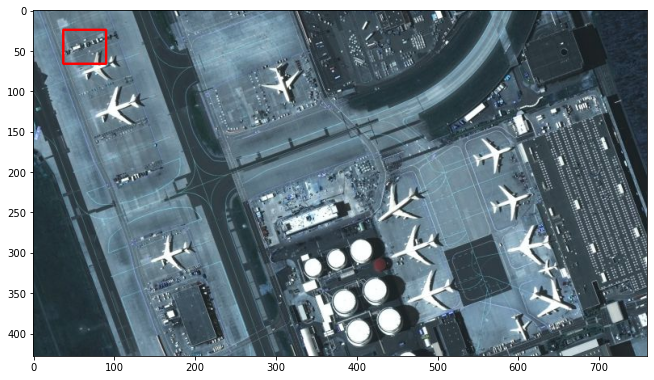

In [24]:
#Giving function image to be highlighted based on Least Disimilarity Eucledian Distance Results
imgTarget3=imgTarget0
imgOutputHiglightedLeastDisimilarEucledianDistanceL2RGB=imgHighlightDisimilarityTemplateEucledianDistL2(resolutionDisimilarityEucledianDistL2,imgTarget3,w,h);
plt.figure(figsize=(11, 11))
plt.imshow(imgOutputHiglightedLeastDisimilarEucledianDistanceL2RGB)
plt.show()
plt.close() 

Making the second disimilarity function; L1 Norm or in other words computing Manhattan distance.

In [25]:
def findManhattanDistL1(imgOne,imgTwo):
    if(imgOne.shape==imgTwo.shape):
        return sum(sum(abs(imgOne-imgTwo)))
    else:
        print("Dimensions of given inputs do not match.")
        return

In [26]:
def disimilarityTemplateManhattanDistL1(imgPatch,imgTarget):
    if (imgTarget.shape[0]-imgPatch.shape[0]>-1)and(imgTarget.shape[1]-imgPatch.shape[1]>-1):
        output=np.zeros([imgTarget.shape[0]-imgPatch.shape[0]+1,imgTarget.shape[1]-imgPatch.shape[1]+1])
        for x in range(0,imgTarget.shape[0]-imgPatch.shape[0]+1):  ##+1
            for y in range(0,imgTarget.shape[1]-imgPatch.shape[1]+1): ##+1
                output[x,y]=findManhattanDistL1(imgPatch,imgTarget[x:x+imgPatch.shape[0],y:y+imgPatch.shape[1]])
        return output
    else:
        print("Target image dimension is less than the target image dimension")
        return

In [27]:
def imgHighlightDisimilarityTemplateManhattanDistL1(resolutionDisimilarityManhattanDistL1,imgOutputHiglightedRGB,patchWidth,patchHeight):
  # Store the coordinates of matched area in a numpy array
  location = findMin2DIndex(resolutionDisimilarityManhattanDistL1)
  # Draw a rectangle around the matched region
  cv2.rectangle(imgOutputHiglightedRGB, (location[1],location[0]), (location[1] + patchWidth, location[0] + patchHeight), (255, 255, 255), 2)
  return imgOutputHiglightedRGB

In [28]:
resolutionDisimilarityManhattanDistL1=disimilarityTemplateManhattanDistL1(standardizeImg(imgPatch1Gray),standardizeImg(imgTargetGray))

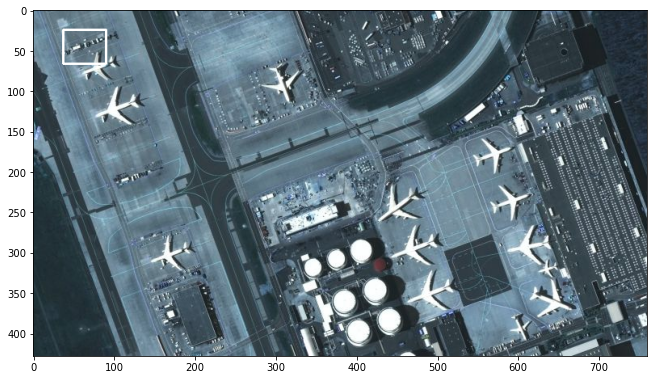

In [29]:
#Giving function image to be highlighted based on Least Disimilarity Manhattan Distance Results
imgTarget4=imgTarget0
imgOutputHiglightedLeastDisimilarManhattanDistanceL1RGB=imgHighlightDisimilarityTemplateManhattanDistL1(resolutionDisimilarityManhattanDistL1,imgTarget4,w,h);
plt.figure(figsize=(11, 11))
plt.imshow(imgOutputHiglightedLeastDisimilarManhattanDistanceL1RGB)
plt.show()
plt.close() 

3) Showing Similarities and disimilarities on surface plot & 4) Localize the area which gives maximum similarity score and lowest disimilarity score.

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [31]:
imgTargetGray
imgPatch1Gray
x = np.arange(0, imgTargetGray.shape[0]-imgPatch1Gray.shape[0]+1, 1)
y = np.arange(0, imgTargetGray.shape[1]-imgPatch1Gray.shape[1]+1, 1)
y, x = np.meshgrid(y,x)

Cross Correlation Similarity Surface Plot

Maximum Similarity is at  [24, 37] offset in [x,y] position in reference to the target image.


C:\Users\Siraj\AppData\Local\Temp\ipykernel_7788\2877321204.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection ='3d')


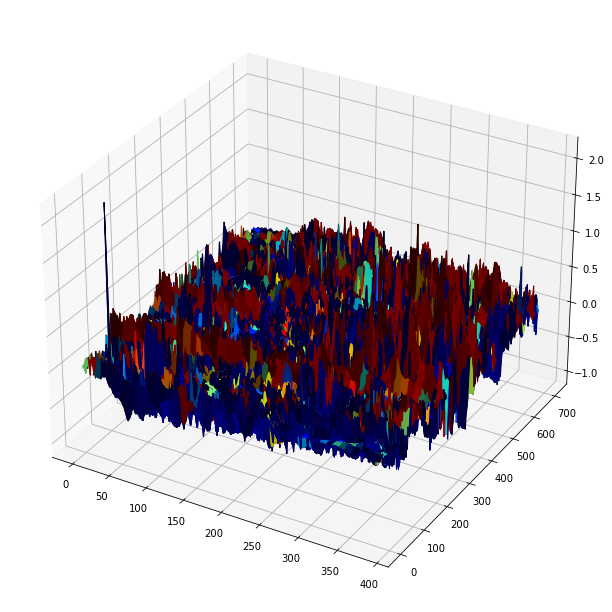

In [32]:
print("Maximum Similarity is at ",findMax2DIndex(resolutionCrossCorr),"offset in [x,y] position in reference to the target image.")
fig = plt.figure(figsize=(11, 11)) 
axes = fig.gca(projection ='3d')
color=cm.jet(np.array(resolutionCrossCorr)/np.amax(np.array(resolutionCrossCorr))*30)
axes.plot_surface(x,y,np.array(resolutionCrossCorr),facecolors =color)
plt.show()
plt.close()

Normalized Cross Correlation Similarity Surface Plot

Maximum Similarity is at  [24, 37] offset in [x,y] position in reference to the target image.


C:\Users\Siraj\AppData\Local\Temp\ipykernel_7788\4029765008.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection ='3d')


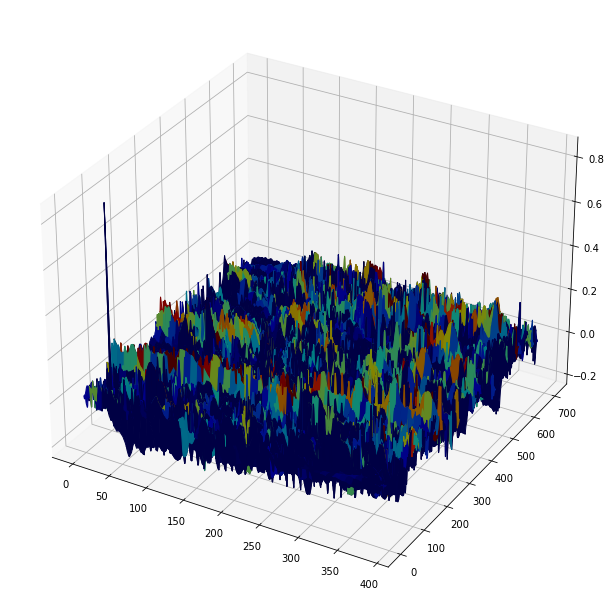

In [33]:
print("Maximum Similarity is at ",findMax2DIndex(resolutionCrossCorrNorm),"offset in [x,y] position in reference to the target image.")
fig = plt.figure(figsize=(11, 11)) 
axes = fig.gca(projection ='3d')
color=cm.jet(((np.array(resolutionCrossCorrNorm))*8))
axes.plot_surface(x,y,np.array(resolutionCrossCorrNorm),facecolors =color)
plt.show()
plt.close()

L2 Norm or Eucledian Distance or Disimilarity Surface Plot

Lowest Disimilarity is at  [24, 37] offset in [x,y] position in reference to the target image.


C:\Users\Siraj\AppData\Local\Temp\ipykernel_7788\3599095976.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection ='3d')


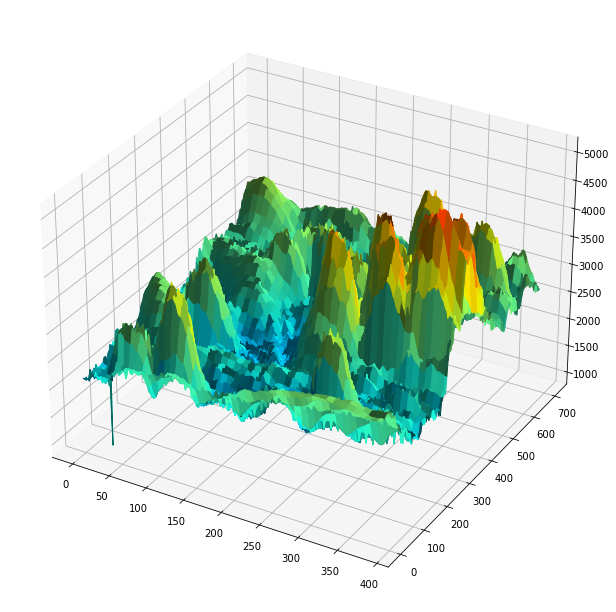

In [34]:
print("Lowest Disimilarity is at ",findMin2DIndex(resolutionDisimilarityEucledianDistL2),"offset in [x,y] position in reference to the target image.")
fig = plt.figure(figsize=(11, 11)) 
axes = fig.gca(projection ='3d')
color=cm.jet(np.array(resolutionDisimilarityEucledianDistL2)/np.amax(np.array(resolutionDisimilarityEucledianDistL2))*0.85)
axes.plot_surface(x,y,np.array(resolutionDisimilarityEucledianDistL2),facecolors =color)   
plt.show()
plt.close()

L1 Norm or Manhattan Distance or Disimilarity Surface Plot

Lowest Disimilarity is at  [24, 37] offset in [x,y] position in reference to the target image.


C:\Users\Siraj\AppData\Local\Temp\ipykernel_7788\3743078340.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection ='3d')


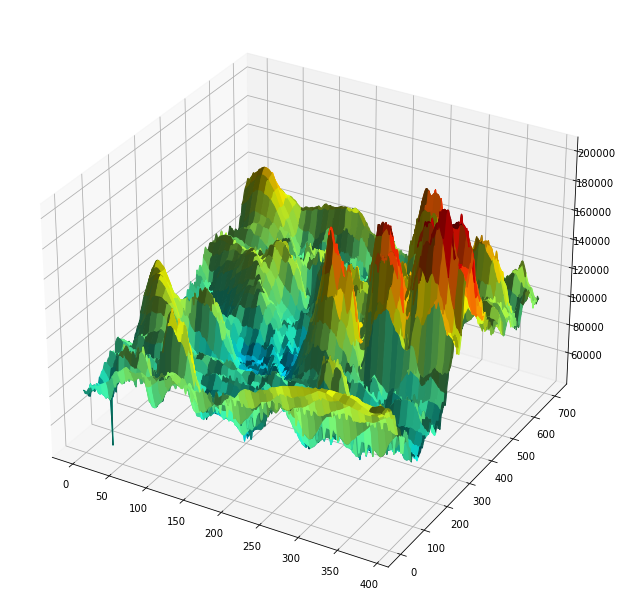

In [35]:
print("Lowest Disimilarity is at ",findMin2DIndex(resolutionDisimilarityManhattanDistL1),"offset in [x,y] position in reference to the target image.")
fig = plt.figure(figsize=(11, 11)) 
axes = fig.gca(projection ='3d')
color=cm.jet(np.array(resolutionDisimilarityManhattanDistL1)/np.amax(np.array(resolutionDisimilarityManhattanDistL1)))
axes.plot_surface(x,y,np.array(resolutionDisimilarityManhattanDistL1),facecolors =color)   
plt.show()
plt.close()